# Import Libraries

In [5]:
from myImports import *

# Loading Data

In [25]:
train_df = pd.read_csv('data/cs-training.csv', index_col=0)
# test_df = pd.read_csv('data/cs-test.csv', index_col=0)
train_df = train_df.dropna()
# test_df = test_df.fillna(0)

# Data Visualization

#### Sample data

In [26]:
train_df.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Statictics on Data

In [27]:
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


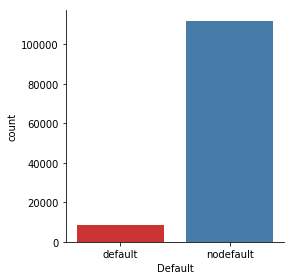

In [37]:
#see defaults vs nondefaults by creating new column called 'Default'
train_df['Default'] = train_df.SeriousDlqin2yrs.map({0:'nodefault', 1:'default'})
#Plot defaults
defaultplot = sns.factorplot('Default', data=train_df, kind="count", palette='Set1')
# defaultplot.savefig("default.pdf",format="pdf")

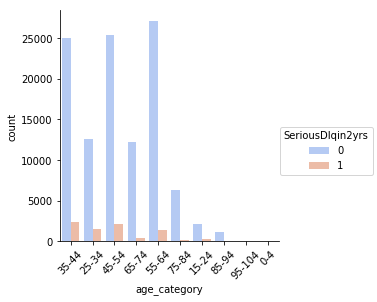

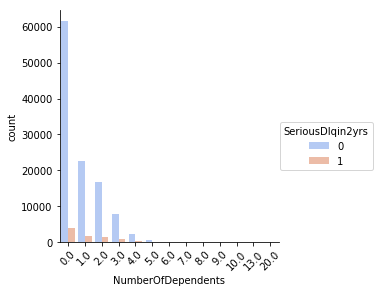

In [38]:
#truncate the age into nearest 10, 20, 30, 40 ...
train_df['age_rounded'] = np.round(train_df['age'],-1)
#categorize ages 0-5, 5-15, 15-25, ...
categories_dict = {0 : '0-4', 10 : '5-14', 20 : '15-24', 30: '25-34', 40: '35-44',
                    50 : '45-54',60 : '55-64', 70 : '65-74', 80 : '75-84',
          90 : '85-94',100 : '95-104', 110 : '105+'}
train_df['age_category'] = train_df['age_rounded'].map(categories_dict)

#defaults vs age
defaultplot = sns.factorplot('age_category', data=train_df, hue='SeriousDlqin2yrs',kind="count",palette='coolwarm')
defaultplot.set_xticklabels(rotation=45)
defaultplot.savefig("default_age.pdf",format="pdf")

#defaults vs # of dependents
defaultplot = sns.factorplot('NumberOfDependents', data=train_df, hue='SeriousDlqin2yrs',kind="count",palette='coolwarm')
defaultplot.set_xticklabels(rotation=45)
# defaultplot.savefig("default_dependents.pdf",format="pdf")

Text(0.5,15,'age')

Text(27.125,0.5,'Frequency')

Text(0.5,15,'Num Times Late 30-59 Days')

Text(209.743,0.5,'Frequency')

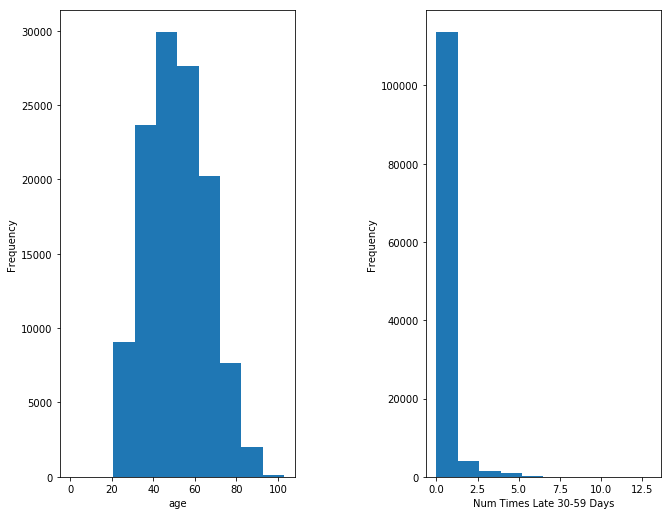

<Figure size 432x288 with 0 Axes>

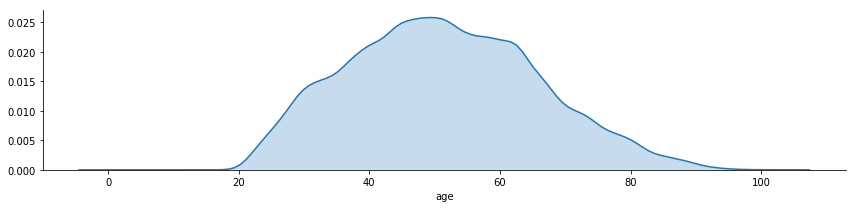

In [98]:
#Historam of Age
fig1 = plt.figure()
fig2 = plt.figure()
ax1 = fig1.add_subplot(1,2, 1) #1 rows, 1 column, 1st plot
ax2 = fig1.add_subplot(1,2, 2) #1 rows,1 column, 1st plot

fig1.tight_layout(pad=-10, w_pad=10, h_pad=10)

n, bins, patches = ax1.hist(train_df['age'])
ax1.set_xlabel('age')
ax1.set_ylabel('Frequency')
# fig1.savefig("hist_age.pdf", format='pdf')

# trainDF.is_copy = False
train_df['NumberOfTime30-59DaysPastDueNotWorse'].loc[(train_df['NumberOfTime30-59DaysPastDueNotWorse']==98) 
    | (train_df['NumberOfTime30-59DaysPastDueNotWorse']==96)] = train_df['NumberOfTime30-59DaysPastDueNotWorse'].median()
#histogram of the NumberOfTime30-59DaysPastDueNotWorse
n, bins, patches = ax2.hist(train_df['NumberOfTime30-59DaysPastDueNotWorse'])
ax2.set_xlabel('Num Times Late 30-59 Days')
ax2.set_ylabel('Frequency')
# fig2.savefig("hist_late.pdf", format='pdf')


#can also visualize data with KDE plot
#similar to histogram in that it treats each data point as Gaussian distribution
#and then takes cumulative probability function

# Set the figure equal to a facetgrid with the training set as data and change the aspect ratio
fig = sns.FacetGrid(train_df, aspect=4)
# Next use map to plot all the possible kdeplots for the 'age' values
sns_plot = fig.map(sns.kdeplot,'age',shade= True)

In [6]:
Y = train_df.SeriousDlqin2yrs                      # data: Labels
X = train_df.drop(['SeriousDlqin2yrs'], axis=1)    # data: Features
#train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
#this automatically splits them into training and test sets, 75% and 25% respectively

In [8]:

train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


# Model Exploration, Score, and Accuracy

In [65]:
def train(model, X_train, Y_train):
    log_model = model
    log_model.fit(X_train, Y_train)
    print("Score is    :",log_model.score(X_train, Y_train))
    return log_model
    
def predict_acc(log_model, X_test, Y_test):
    predicted= log_model.predict(X_test)
    print ("Accuracy is :", metrics.accuracy_score(Y_test,predicted))

In [81]:
models = []
models.append(('LR', LogisticRegression()))
# models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('PCPT', Perceptron()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', LinearSVC()))
# models.append(('SGD', SGDClassifier()))
# models.append(('DCT', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))


results = []
names = []
report = []
scoring = 'accuracy'
for name, model in models:
    print(name)
    model = train(model, X_train, Y_train)
    predict_acc(model, X_test, Y_test)
    print('------------------------------------------------------')


print('Completed')

LR
Score is    : 0.9312091883681999
Accuracy is : 0.931222562192364
------------------------------------------------------
PCPT
Score is    : 0.9298233944191306
Accuracy is : 0.9295596647598776
------------------------------------------------------
RFC
Score is    : 0.9999113091872596
Accuracy is : 0.9333843288545962
------------------------------------------------------
Traning Completed


### Logistic Regression

In [71]:
model = LogisticRegression()
model = train(model, X_train, Y_train)
predict_acc(model, X_test, Y_test)

Score is    : 0.9312091883681999
Accuracy is : 0.931222562192364


### KNN

In [72]:
model = KNeighborsClassifier(n_neighbors=3)
model = train(model, X_train, Y_train)
predict_acc(model, X_test, Y_test)

Score is    : 0.9396126428753562
Accuracy is : 0.9245709724624185


### Naive Bayes

In [73]:
model = GaussianNB()
model = train(model, X_train, Y_train)
predict_acc(model, X_test, Y_test)

Score is    : 0.9300562078025743
Accuracy is : 0.930125049886923


### Perceptron

In [74]:
model = Perceptron()
model = train(model, X_train, Y_train)
predict_acc(model, X_test, Y_test)

Score is    : 0.9298233944191306
Accuracy is : 0.9295596647598776


### Linear SVC

In [75]:
model = LinearSVC()
model = train(model, X_train, Y_train)
predict_acc(model, X_test, Y_test)

Score is    : 0.9310207203911265
Accuracy is : 0.9314886257815618


### Stochastic Gradient Descent

In [76]:
model = SGDClassifier()
model = train(model, X_train, Y_train)
predict_acc(model, X_test, Y_test)

Score is    : 0.9133490759525947
Accuracy is : 0.914759877610749


### Decision Tree

In [77]:
model = DecisionTreeClassifier()
model = train(model, X_train, Y_train)
predict_acc(model, X_test, Y_test)

Score is    : 0.9999778272968148
Accuracy is : 0.8891179992018092


### Random Forest

In [78]:
model = RandomForestClassifier(n_estimators=100)
model = train(model, X_train, Y_train)
predict_acc(model, X_test, Y_test)

Score is    : 0.9999445682420373
Accuracy is : 0.9326526539843022


## Cross Validation

In [ ]:
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
# models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('PCPT', Perceptron()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', LinearSVC()))
# models.append(('SGD', SGDClassifier()))
# models.append(('DCT', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
# evaluate each model in turn
results = []
names = []
report = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    report.append([name, cv_results.mean()])
#     print(msg)

print('Completed')

In [ ]:
# Print accuracy
for clf in report:
    print('{} : {}'.format(clf[0], clf[1]))